In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
from keras import regularizers

Using TensorFlow backend.
/home/shasur/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shasur/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shasur/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shasur/anaconda3/lib/python3.7/site-packages/tenso

In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, VGG16, xception
from keras.applications.mobilenet import preprocess_input
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.xception import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [4]:
path_troll = os.path.realpath('/home/shasur/dataset/Tamil_memes/train/troll/')
path_NOT = os.path.realpath('/home/shasur/dataset/Tamil_memes/train/Not_troll/')

In [5]:
path_troll

'/home/shasur/dataset/Tamil_memes/train/troll'

In [6]:
path_flickr = os.path.realpath('/home/shasur/dataset/Tamil_memes/flickr1k/')

In [7]:
troll_img = os.listdir(path_troll)
dir_troll = [os.path.join(path_troll, filename) for filename in troll_img]
Not_troll_img = os.listdir(path_NOT)
dir_not = [os.path.join(path_NOT, filename) for filename in Not_troll_img]

In [8]:
print("# of troll images: ", len(troll_img), '\n',
      "# of not troll images: ", len(Not_troll_img))

# of troll images:  1751 
 # of not troll images:  918


In [9]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

W0213 23:02:25.708136 140058098226944 deprecation_wrapper.py:119] From /home/shasur/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0213 23:02:25.735908 140058098226944 deprecation_wrapper.py:119] From /home/shasur/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0213 23:02:25.741946 140058098226944 deprecation_wrapper.py:119] From /home/shasur/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0213 23:02:25.774345 140058098226944 deprecation_wrapper.py:119] From /home/shasur/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_se

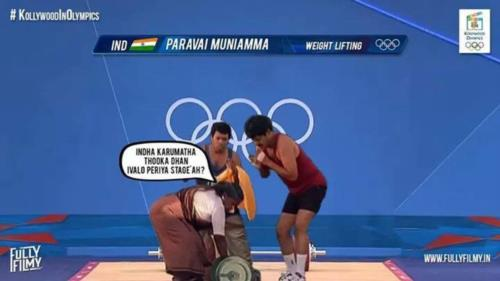

In [10]:
Image(filename=dir_troll[0])

In [11]:
preprocessed_image = prepare_image(dir_troll[0])
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04509417', 'unicycle', 0.3532274),
  ('n04039381', 'racket', 0.32012028),
  ('n02790996', 'barbell', 0.12152538),
  ('n02835271', 'bicycle-built-for-two', 0.050112635),
  ('n02777292', 'balance_beam', 0.04180727)]]

In [12]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(1,activation='sigmoid')(x) #final layer with softmax activation

/home/shasur/anaconda3/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [13]:
model=Model(inputs=base_model.input,outputs=preds)

In [14]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [15]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [16]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('/home/shasur/dataset/Tamil_memes/train/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 shuffle=True)
test_generator=test_generator.flow_from_directory('/home/shasur/dataset/Tamil_memes/test/',
                                                 target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=1,
                                                  class_mode='binary',
                                                 shuffle=True)

Found 2668 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [17]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [18]:
np.unique(train_generator.classes)

array([0, 1], dtype=int32)

In [19]:
# Addressing imbalanced data with class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_generator.classes),
                                                 train_generator.classes)

In [20]:
class_weights

array([1.45315904, 0.76228571])

In [21]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

W0213 23:02:43.581260 140058098226944 deprecation_wrapper.py:119] From /home/shasur/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0213 23:02:43.626188 140058098226944 deprecation.py:323] From /home/shasur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
83/83 [==============================] - 33s 395ms/step - loss: 0.2169 - acc: 0.9352
Epoch 2/10
83/83 [==============================] - 24s 290ms/step - loss: 0.0842 - acc: 0.9751
Epoch 3/10
83/83 [==============================] - 24s 286ms/step - loss: 0.0385 - acc: 0.9876
Epoch 4/10
83/83 [==============================] - 24s 284ms/step - loss: 0.0519 - acc: 0.9872
Epoch 5/10
83/83 [==============================] - 24s 287ms/step - loss: 0.0179 - acc: 0.9951
Epoch 6/10
83/83 [==============================] - 24s 284ms/step - loss: 0.0301 - acc: 0.9912
Epoch 7/10
83/83 [==============================] - 24s 286ms/step - loss: 0.0341 - acc: 0.9883
Epoch 8/10
83/83 [==============================] - 24s 283ms/step - loss: 0.0220 - acc: 0.9947
Epoch 9/10
83/83 [==============================] - 24s 284ms/step - loss: 0.0449 - acc: 0.9887
Epoch 10/10
83/83 [==============================] - 24s 288ms/step - loss: 0.0257 - acc: 0.9928


In [22]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = dir_not[1]
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[0.00114165]], dtype=float32)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [24]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, steps=300)
y_pred = np.round(list(itertools.chain(*Y_pred)))
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['troll', 'Not_troll']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 43  57]
 [ 84 116]]
Classification Report
              precision    recall  f1-score   support

       troll       0.34      0.43      0.38       100
   Not_troll       0.67      0.58      0.62       200

    accuracy                           0.53       300
   macro avg       0.50      0.51      0.50       300
weighted avg       0.56      0.53      0.54       300



In [26]:
with open('result_mobilenet30k.csv','w') as k:
    print('Confusion Matrix\n',confusion_matrix(test_generator.classes, y_pred),
          '\nClassification Report\n',classification_report(test_generator.classes, y_pred, target_names=['troll', 'Not_troll']))

Confusion Matrix
 [[ 43  57]
 [ 84 116]] 
Classification Report
               precision    recall  f1-score   support

       troll       0.34      0.43      0.38       100
   Not_troll       0.67      0.58      0.62       200

    accuracy                           0.53       300
   macro avg       0.50      0.51      0.50       300
weighted avg       0.56      0.53      0.54       300

